# 회귀(Regression)

In [145]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

from IPython.display import Image

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# regression 성능평가 지표
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve, roc_curve,roc_auc_score 
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler, Binarizer
import graphviz

import missingno as msno

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

### 회귀란 종속변수(target)와 하나 이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법이다.

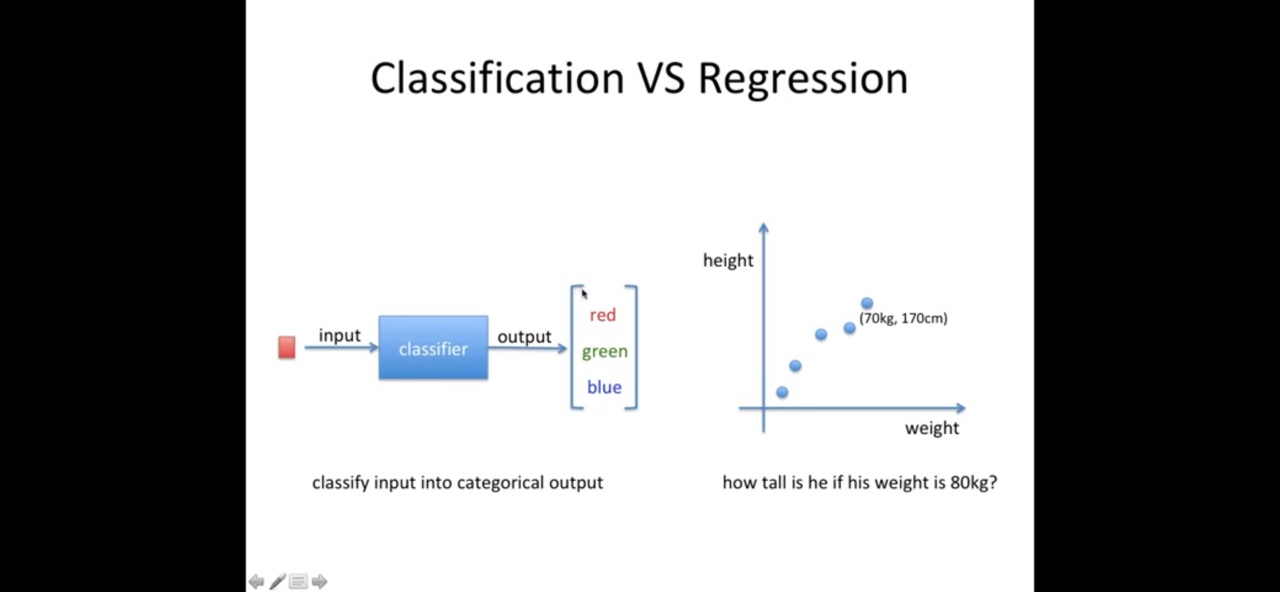

In [154]:
Image('C:/img/linear_01.jpg', width = 700)

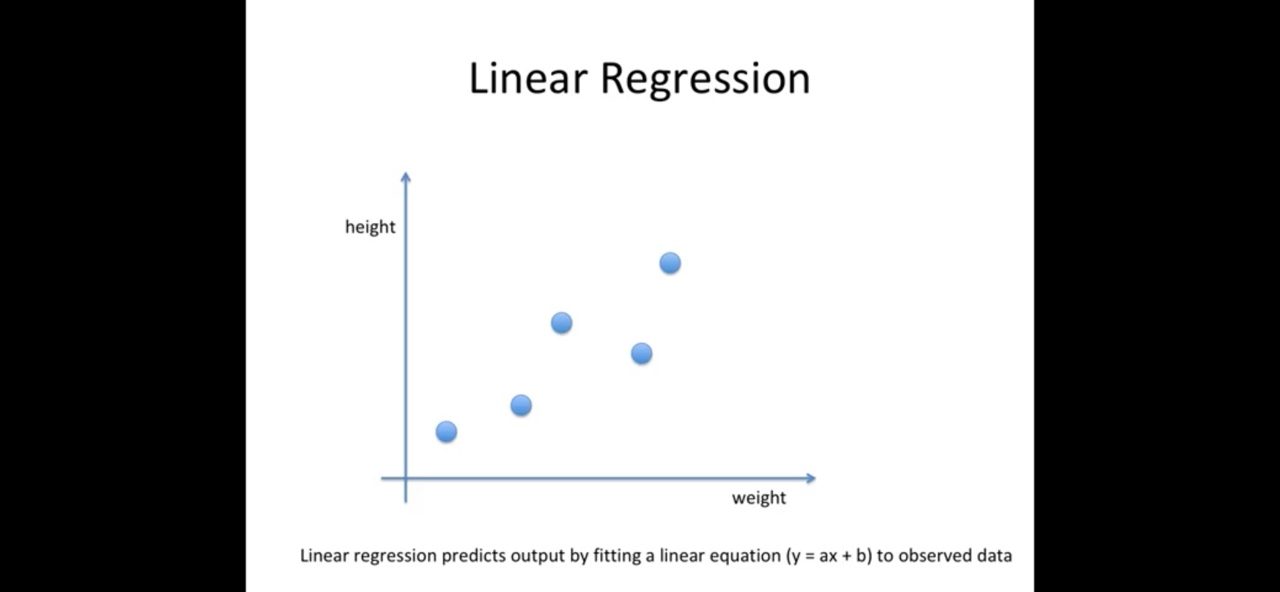

In [157]:
Image('C:/img/linear_02.jpeg', width = 700)

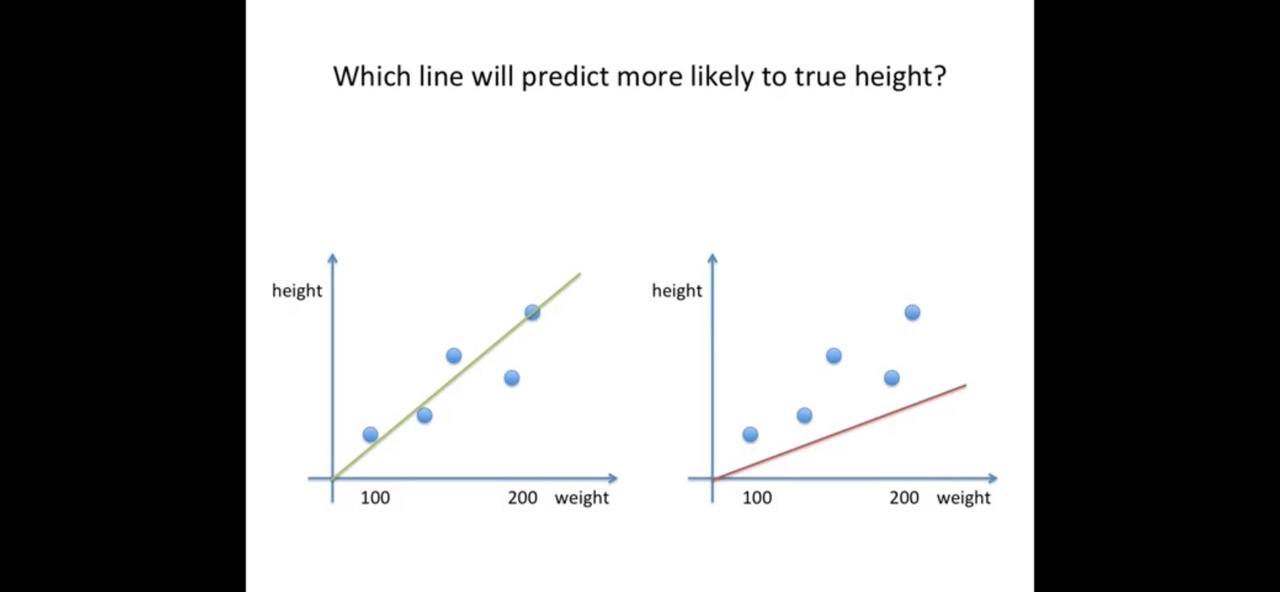

In [159]:
Image('C:/img/linear_03.jpeg', width = 700)

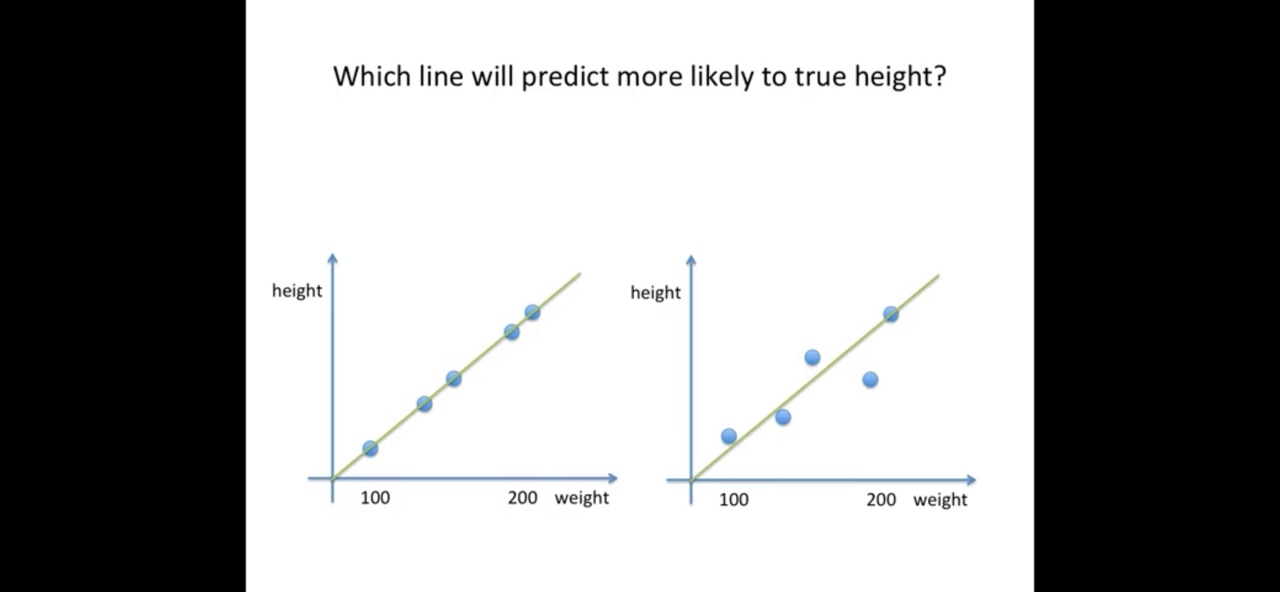

In [160]:
Image('C:/img/linear_04.jpeg', width = 700)

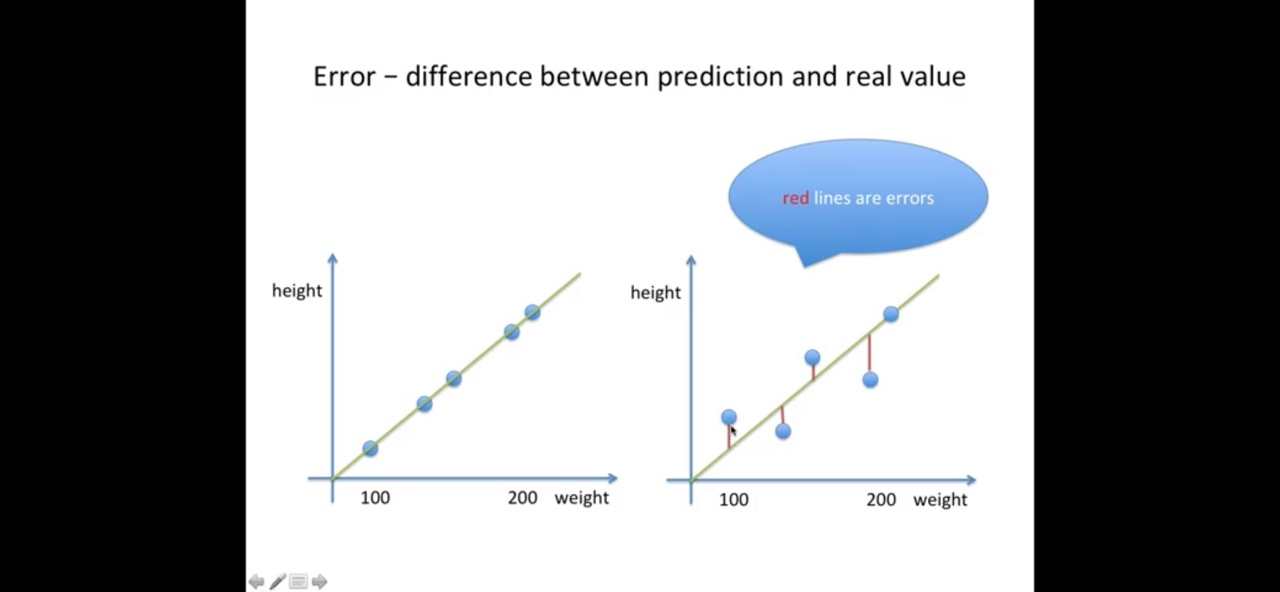

In [161]:
Image('C:/img/linear_05.jpeg', width = 700)

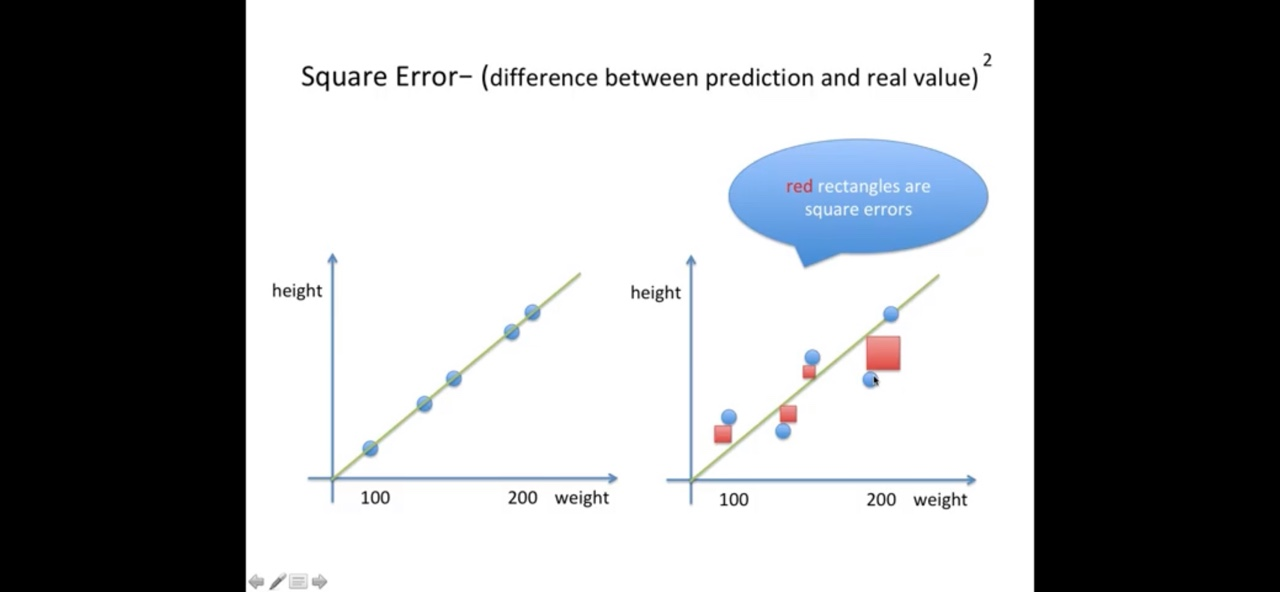

In [162]:
Image('C:/img/linear_06.jpeg', width = 700)

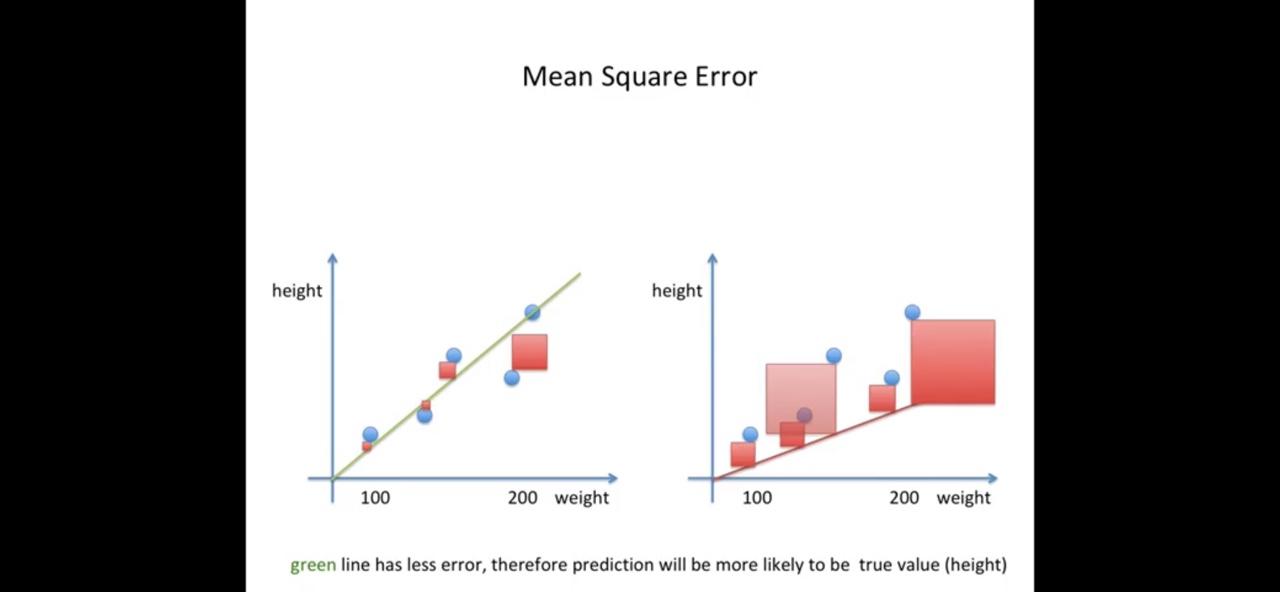

In [163]:
Image('C:/img/linear_07.jpeg', width = 700)

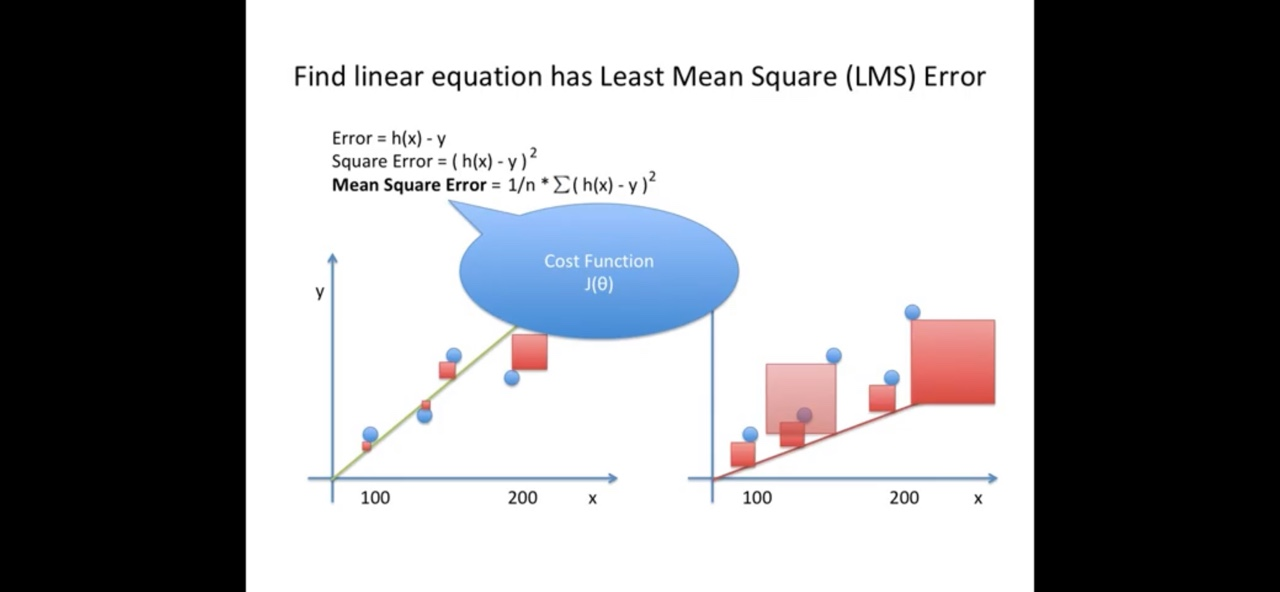

In [164]:
Image('C:/img/linear_09.jpeg', width = 700)

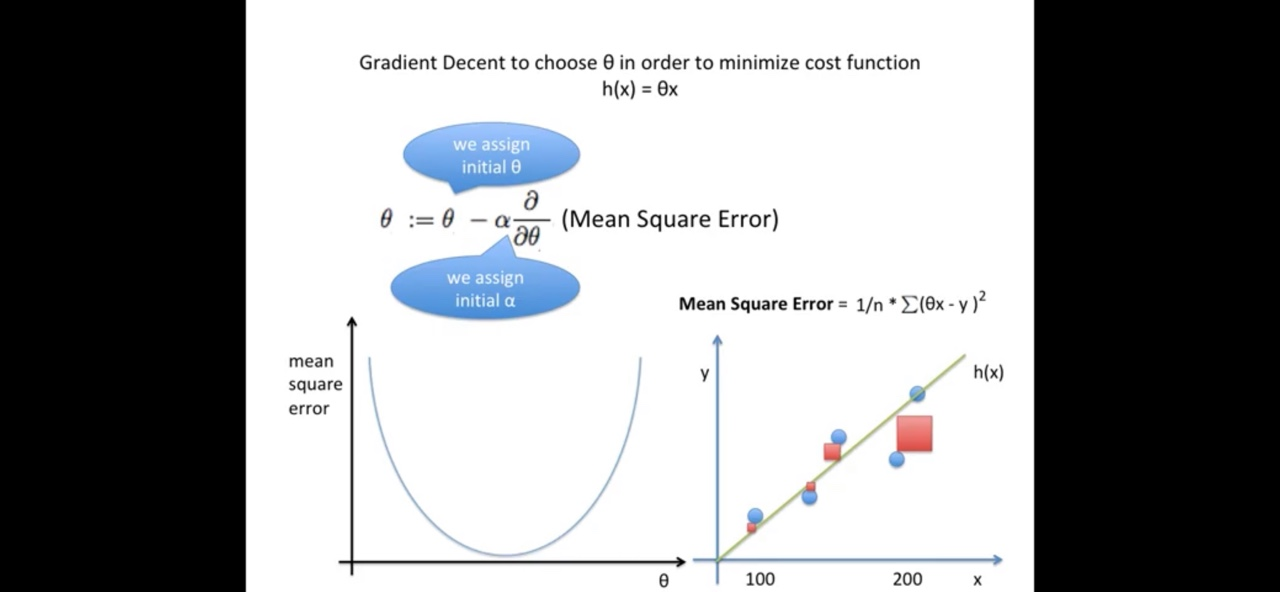

In [165]:
Image('C:/img/linear_10.jpeg', width = 700)

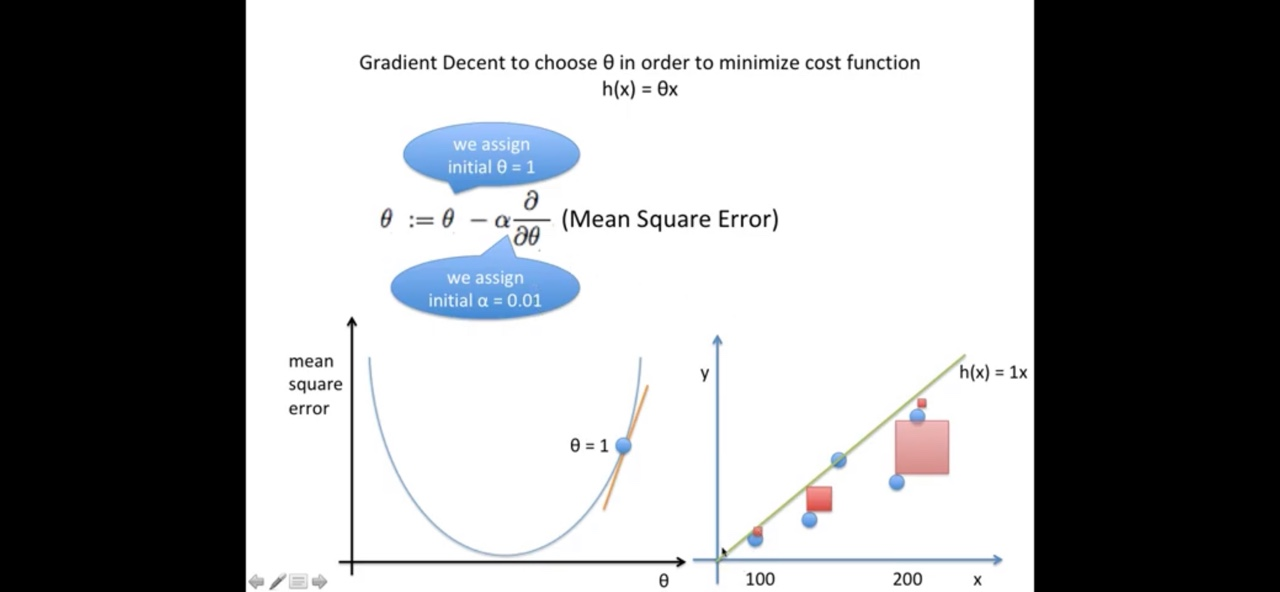

In [166]:
Image('C:/img/linear_11.jpeg', width = 700)

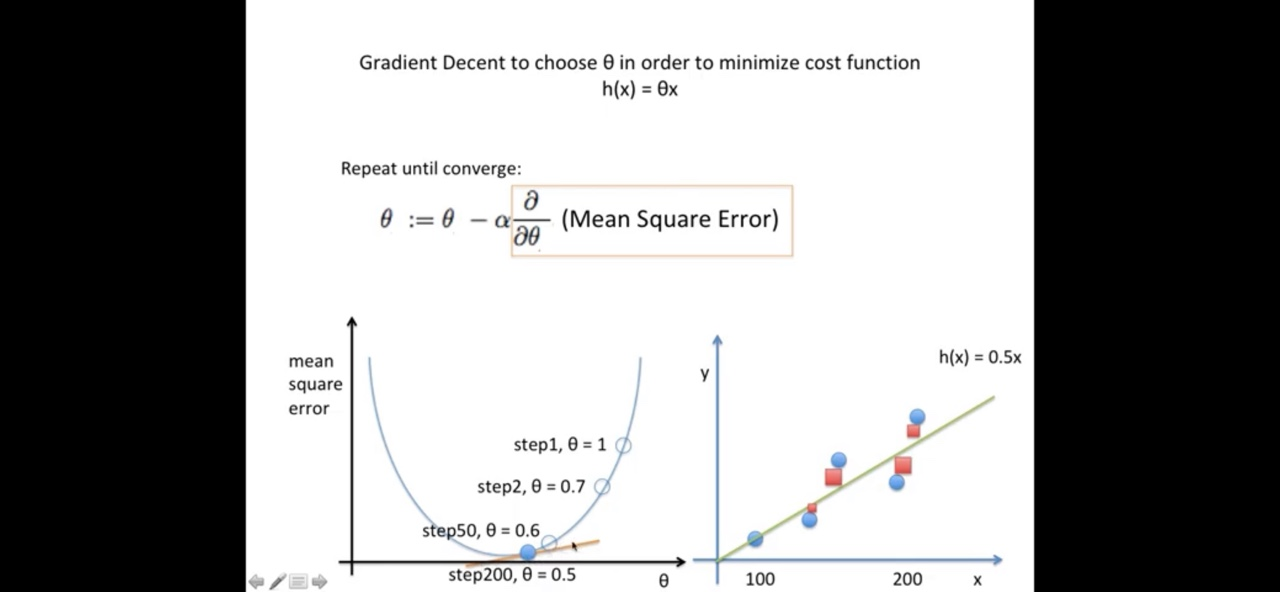

In [168]:
Image('C:/img/linear_15.jpeg', width = 700)

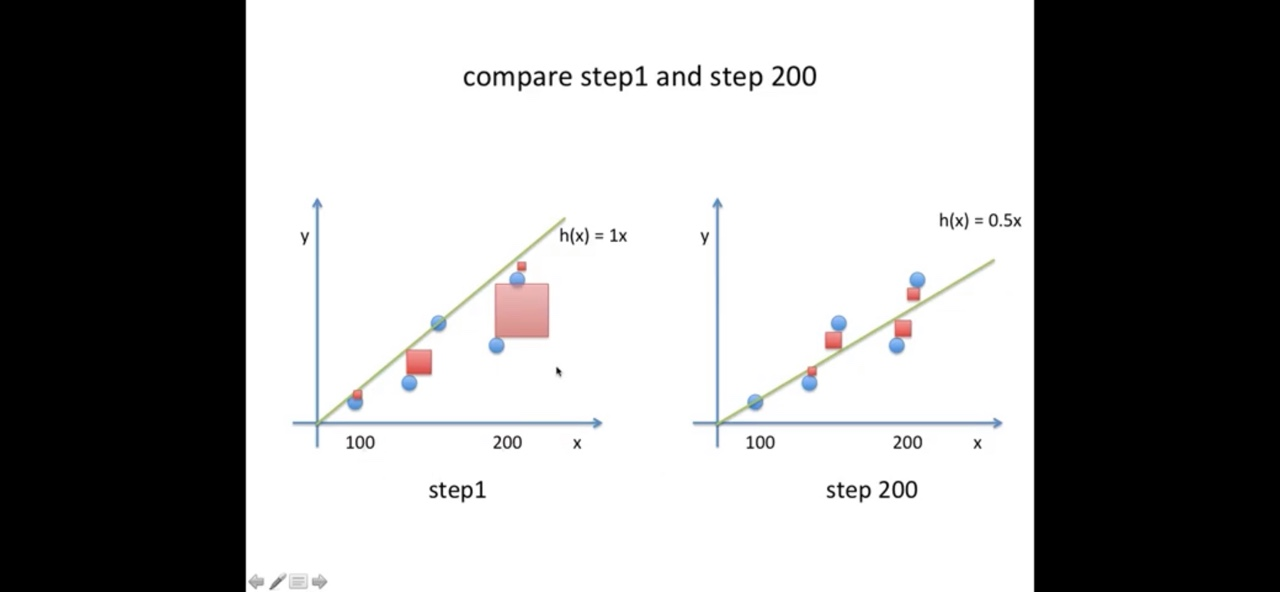

In [169]:
Image('C:/img/linear_16.jpeg', width = 700)

### 회귀의 목표?
X:[1,2,3] → 독립변수
Y:[3,5,7] → 종속변수

Q. X = 4 일때, y는?

f(x) = 2x+1에 x에 4를 대입하면 y = 9

f(x) = wx+b

선형회귀를 통해서 우리의 목표는 w,b를 찾는게 목표가 된다

해당 가설이 얼마나 잘못 되었는지를 확인?

- 비용함수를 활용해서!

비용 함수 공식 : 


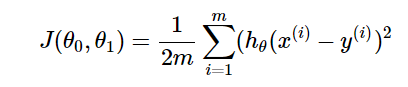

In [4]:
print('비용 함수 공식 : ')
Image('C:/img/비용함수공식.png')

### Linear Regression

- f(x) = wx+b
- 예측함수를 통해서 예측값과 실제값의 차이를 계산
- cost(w,b) - 업데이트를 통해서 w, b 값을 조정
- 위 과정을 특정 횟수만큼 반복
- 수정된 f(x) = wx + b
- 독립변수 또는 설명변수 → feature, 종속변수 → target(수치형)
- 독립변수 개수에 따라서 단일회귀 또는 다중회귀라고 한다

#### 단일회귀

In [172]:
frm = pd.DataFrame({
'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46],
})
frm

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [173]:
# 독립변수(또는 설명변수라고도 함)
X=frm[['height']]
X

,height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57
5,1.60
6,1.63
7,1.65
8,1.68
9,1.70


In [174]:
# 종속변수
Y=frm[['mass']]
Y

,mass
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


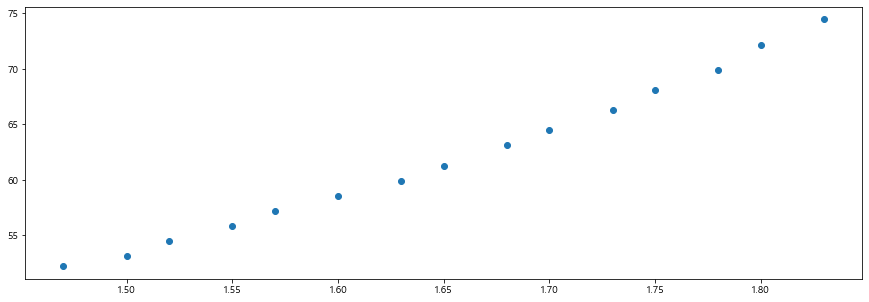

<function matplotlib.pyplot.close(fig=None)>

In [175]:
plt.figure(figsize=(15,5))

plt.plot(X,Y,'o')

plt.show()
plt.close

In [176]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

LinearRegression()

In [177]:
user_pred = linear_model.predict([[1.79]])
print(user_pred)

y_pred = linear_model.predict(X)
print(y_pred)

[[70.61525799]]
[[51.0081583 ]
 [52.84632389]
 [54.07176763]
 [55.90993322]
 [57.13537695]
 [58.97354255]
 [60.81170814]
 [62.03715188]
 [63.87531747]
 [65.1007612 ]
 [66.9389268 ]
 [68.16437053]
 [70.00253613]
 [71.22797986]
 [73.06614545]]


X인 height에 1.79가 들어갔을때 Y인 mass의 예측값을 반환해줌

In [178]:
print('w(기울기) : ', linear_model.coef_)
print('b(절편) : ', linear_model.intercept_)

w(기울기) :  [[61.27218654]]
b(절편) :  [-39.06195592]


In [179]:
(61.27218654*1.79)+-39.06195592 

70.6152579866

기울기와 절편을 통해 구한 일차함수로 계산해보면 y_pred와 동일한 결과가 나옴.

### R - squared(결정계수) :  데이터의 신뢰도를 의미

In [180]:
print('R = ', linear_model.score(X,Y) )

R =  0.9891969224457968


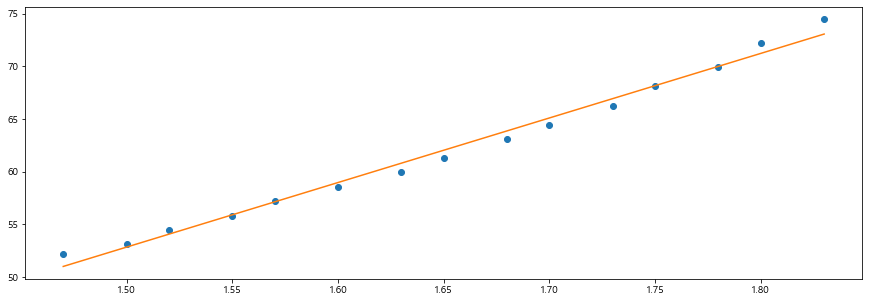

In [182]:
plt.figure(figsize=(15,5))

plt.plot(X,Y,'o')
plt.plot(X, linear_model.predict(X))

plt.show()
plt.close()

### 회귀에선 data의 분포도가 매우 중요! 
- 정규분포를 따르는지도 확인해봐야 함

## [실습] auto-mpg.csv 선형회귀

In [33]:
raw_data = pd.read_csv('C:/Users/whgud/data/auto-mpg.csv',header = None)
raw_data.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acc' , 'model year' , 'origin' , 'name']
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [34]:
raw_data.describe()

,mpg,cylinders,displacement,weight,acc,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [35]:
raw_data['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

- horsepower(엔진출력)
- '?'값을 대체 또는 삭제

In [42]:
# ?값을 결측값으로 대체
raw_data['horsepower'] = raw_data['horsepower'].replace('?',np.nan)

In [43]:
raw_data['horsepower'].unique() # 결측값으로 바뀐것 확인 

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [44]:
# 결측값 삭제후 확인
raw_data.dropna(subset=['horsepower'], axis=0, inplace = True)
raw_data['horsepower'].unique() 

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [45]:
# horsepower 칼럼을 실수형으로 형변환
raw_data['horsepower'] = raw_data['horsepower'].astype('float')
raw_data['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [46]:
# 다중회귀 - 분석에 활용한 독립변수를 선택
mpg_subset_frm = raw_data[['mpg','cylinders','horsepower','weight']]
mpg_subset_frm.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


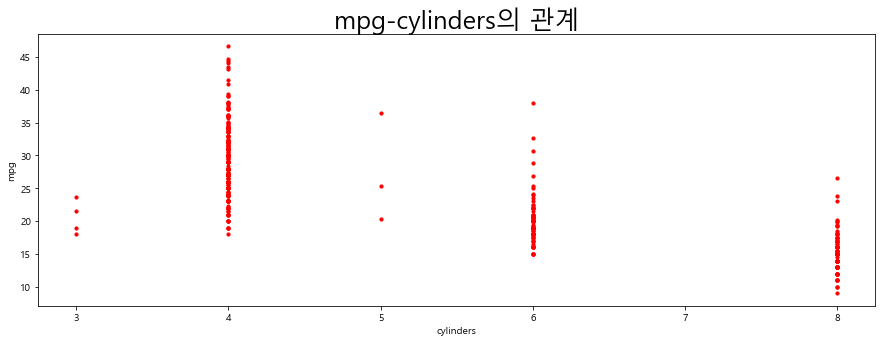

In [63]:
# 선형관계를 파악하기 위해 산점도로 시각화 

mpg_subset_frm.plot(kind = 'scatter', x='cylinders',y='mpg',c='red',s=10,title = 'mpg-cylinders의 관계', figsize=(15,5))
plt.title('mpg-cylinders의 관계', fontsize=25)
plt.show()
plt.close()


mpg와 cylinders는 비선형 관계의 모습을 보이고 있다.

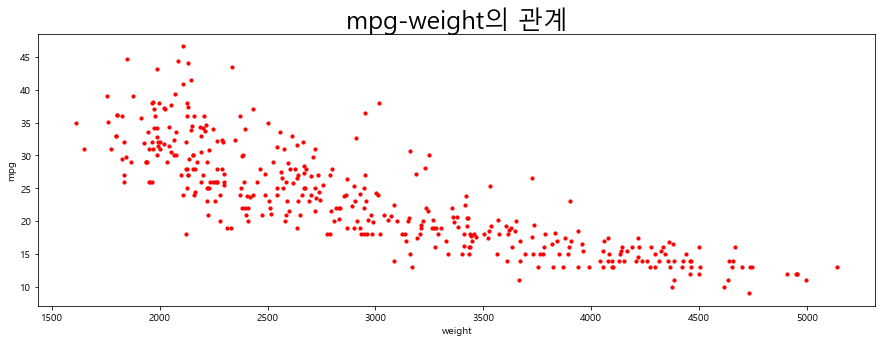

In [61]:
mpg_subset_frm.plot(kind = 'scatter', x='weight',y='mpg',c='red',title = 'mpg-weight의 관계',s=10, figsize=(15,5))
plt.title('mpg-weight의 관계', fontsize=25)
plt.show()
plt.close()

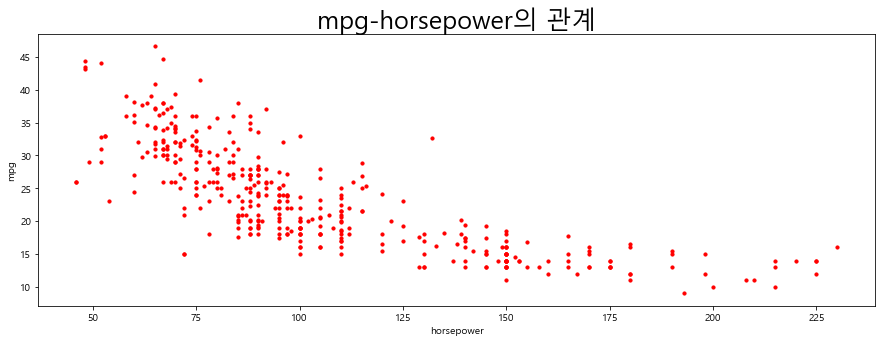

In [62]:
mpg_subset_frm.plot(kind = 'scatter', x='horsepower',y='mpg',c='red',s=10, figsize=(15,5))
plt.title('mpg-horsepower의 관계', fontsize=25)
plt.show()
plt.close()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

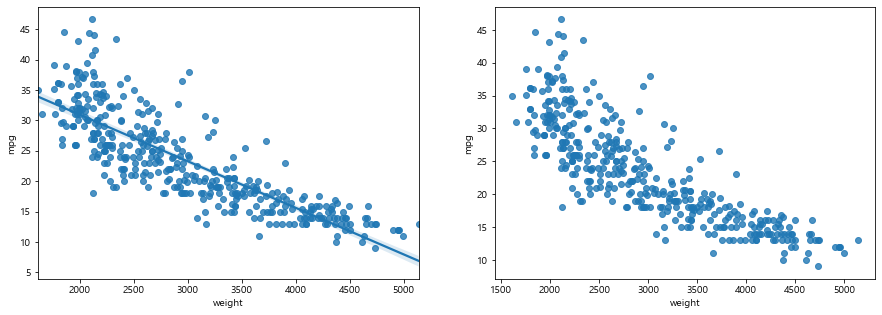

In [65]:
# seaborn으로 선형 관계를 파악해본다면?

fig = plt.figure(figsize = (15,5))
area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=mpg_subset_frm, ax=area01)
sns.regplot(x='weight',y='mpg',data=mpg_subset_frm, ax=area02, fit_reg=False)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

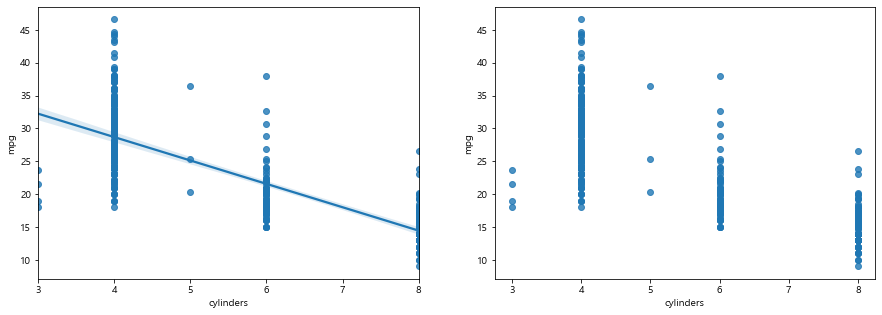

In [66]:
fig = plt.figure(figsize = (15,5))
area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)
sns.regplot(x='cylinders',y='mpg',data=mpg_subset_frm, ax=area01)
sns.regplot(x='cylinders',y='mpg',data=mpg_subset_frm, ax=area02, fit_reg=False)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

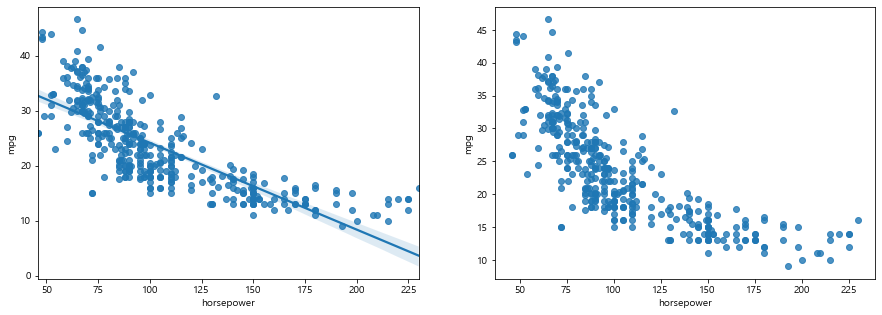

In [67]:
fig = plt.figure(figsize = (15,5))
area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)
sns.regplot(x='horsepower',y='mpg',data=mpg_subset_frm, ax=area01)
sns.regplot(x='horsepower',y='mpg',data=mpg_subset_frm, ax=area02, fit_reg=False)

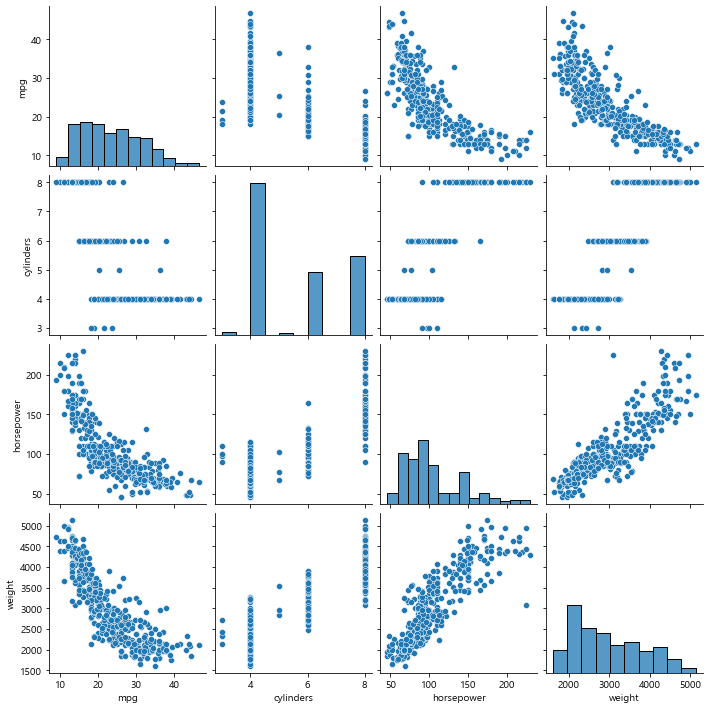

In [68]:
# pairplot으로 한번에 관계도로 시각화 가능! 
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [70]:
# 학습을 위해서 독립변수와 종속변수 세팅
X = mpg_subset_frm[['cylinders','horsepower','weight']] # 독립변수
Y = mpg_subset_frm['mpg'] # 종속변수

In [71]:
# 데이터세트 분리
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [72]:
# 모델 생성
mpg_model = LinearRegression()
mpg_model.fit(X_train, y_train)
print('w(기울기 : )',mpg_model.coef_)
print('b(절편 : )',mpg_model.intercept_)


w(기울기 : ) [-0.15188535 -0.0589312  -0.00530238]
b(절편 : ) 46.34299652357523


In [74]:
# 모델의 신뢰도인 R(결정계수) 구해보기

r_squared = mpg_model.score(X_test, y_test)
print("R : ",r_squared)

R :  0.7138561071545959


In [76]:
# 모델에 전체 X데이터를 입력하여 예측값을 추출
y_pred = mpg_model.predict(X)
y_pred

array([18.88732413, 15.82258268, 18.0692619 , 18.08516903, 18.58964296,
       10.44191195,  9.07649468,  9.59385056,  8.40536982, 13.51682933,
       16.21723588, 16.56263846, 16.34598892, 15.50525449, 27.55974978,
       24.81158265, 25.00656058, 26.70527971, 29.25544374, 33.29475568,
       26.44048585, 27.54686783, 27.54384265, 27.23071644, 26.08717864,
        7.98722991, 10.13846631,  9.51734006,  8.66333799, 29.25544374,
       28.42706264, 28.32329227, 25.57209996, 21.00902936, 21.88694698,
       22.73728557, 22.10434449, 13.08655543, 11.14513696, 14.08536062,
       14.56969216,  8.24701318,  9.94452224,  7.56072917, 23.24360787,
       28.72428171, 22.13615876, 23.60157325, 28.89609208, 29.17469799,
       30.61313849, 30.30727271, 32.50381038, 33.11646613, 32.47502129,
       31.24412152, 28.05817335, 29.74810284, 30.60160955, 27.66352015,
       28.86427781, 12.74190084, 11.56402486, 14.3628994 , 14.21792008,
       16.8179006 ,  8.30430548, 12.12227054, 12.07152396, 10.48

In [77]:
regression_actual_guess = pd.DataFrame({
    'actual':Y,
    'guess':y_pred
})
regression_actual_guess

,actual,guess
0,18.0,18.887324
1,15.0,15.822583
2,18.0,18.069262
3,16.0,18.085169
4,17.0,18.589643
...,...,...
393,27.0,25.873736
394,44.0,31.376967
395,32.0,28.616276
396,28.0,27.161147


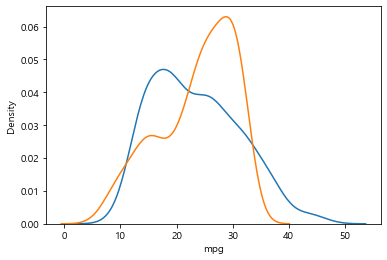

In [80]:
sns.distplot(Y, hist=False, label = 'actual')
sns.distplot(y_pred, hist=False, label = 'guess')

plt.show()
plt.close()

## 주택 임대료 예측모델

In [185]:
house_frm = pd.read_csv('C:/Users/whgud/data/manhattan.csv')
house_frm

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [186]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [187]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [188]:
# 독립변수, 종속변수 설정
X=house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]
Y=house_frm['rent']

상관분석을 위한 시각화 - 


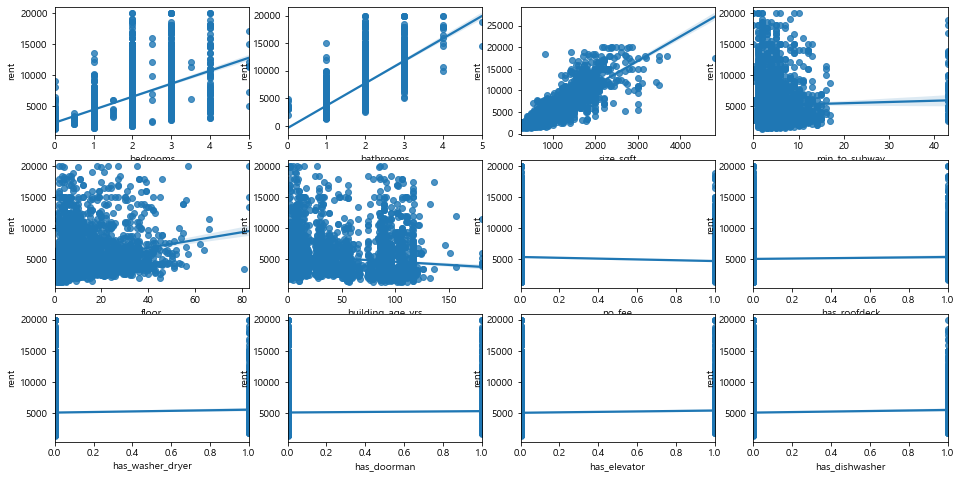

In [189]:
# 상관분석을 위한 시각화
print('상관분석을 위한 시각화 - ')

fig , axs = plt.subplots(figsize=(16, 8) , ncols = 4 , nrows= 3)

for idx , feature in enumerate(X) :
    row = int(idx/4)
    col = idx%4
    sns.regplot(x=feature , y='rent' , data = house_frm , ax=axs[row][col])


In [190]:
# 데이터 세트 분리 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2831, 12), (708, 12), (2831,), (708,))

In [191]:
price_model = LinearRegression()
price_model.fit(X_train,y_train)

print('w(기울기) : ',price_model.coef_)
print('b(절편) : ',price_model.intercept_)

w(기울기) :  [-304.72964384 1158.78261246    4.88315724  -18.74411341   22.70787792
   -7.81871649 -125.8524711    -8.97421713  170.5987588   -37.35605549
  -12.59523591  -15.84252636]
b(절편) :  -351.27412671964066


In [192]:
# 모델의 신뢰도 R 구하기
r_squared = price_model.score(X_test, y_test)
print("R : ",r_squared)

R :  0.8023070306419086


In [193]:
my_apt = [[2,1,620,10,11,12,0,0,1,0,1,1]]
user_pred = price_model.predict(my_apt)
user_pred

array([3336.28860626])

In [194]:
y_pred = price_model.predict(X_test)
y_pred

array([ 3657.49066491,  6115.17388028,  3032.27215465,  4739.06846442,
        3655.23276625,  4757.81341682, 10624.82731375,  6926.54362484,
        2550.94573828,  3172.45498833,  3714.01267719,  2918.39749581,
        4352.4085515 ,  2811.84657123,  4875.23105977,  5647.55270666,
        3348.25411436,  9762.45861781,  3882.71023453,  2823.09604961,
        5302.05103537,  4485.035002  ,  4630.95804736,  6730.48232929,
        2832.70465671,  3969.86061267,  7769.86260241,  3211.2229926 ,
       12711.8284463 ,  2224.7717609 ,  2675.03768942,  2313.21959025,
        2373.33688126,  7995.01315031,  6255.31205115,  3866.57663633,
        7991.95227816,  3920.97508912,  5355.68893133,  8998.43856597,
        5190.40051695,  4365.00378741,  3808.56330792,  2279.07657398,
        4560.36762287,  3146.03954269,  7878.56100818,  6275.71568828,
        3944.0142973 ,  3473.35357826,  6916.52702118,  4157.81935153,
        3888.95303706,  5199.43376809,  3678.66142774,  6242.16660565,
      

In [101]:
price_actual_guess = pd.DataFrame({
    'actual_price':y_test,
    'guess_price': y_pred
})
price_actual_guess

,actual_price,guess_price
2291,3300,3657.490665
1317,5500,6115.173880
2251,3495,3032.272155
361,4500,4739.068464
491,2900,3655.232766
...,...,...
3455,2996,2935.694948
1779,2975,3361.256813
1184,4885,4796.337196
2605,2150,2950.179581


scatter - 실제임대료, 예측임대료


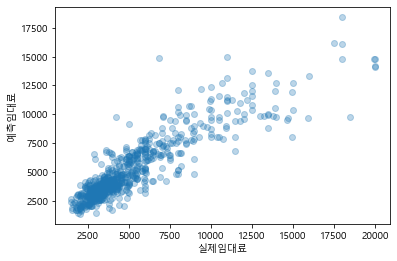

In [195]:
print('scatter - 실제임대료, 예측임대료')

plt.scatter(y_test,y_pred, alpha=0.3)
plt.xlabel('실제임대료')
plt.ylabel('예측임대료')
plt.show()
plt.close()

## iris 회귀

In [106]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [109]:
type(iris.target)

numpy.ndarray

In [123]:
# data와 target을 프레임으로 만들고
# target 값을 target_name으로 변경하여 최종 프레임을 생성해보기

X= pd.DataFrame(iris.data, columns=iris.feature_names)
Y= pd.DataFrame(iris.target,columns=['species'])
display(iris_data)
# 0 : setosa, 1 : versicolor , 2: virginica
Y['species'] = Y['species'].replace([0,1,2],['setosa','versicolor','virginica'])
Y    
    

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [129]:
iris_frm=pd.concat([X, Y], axis=1)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


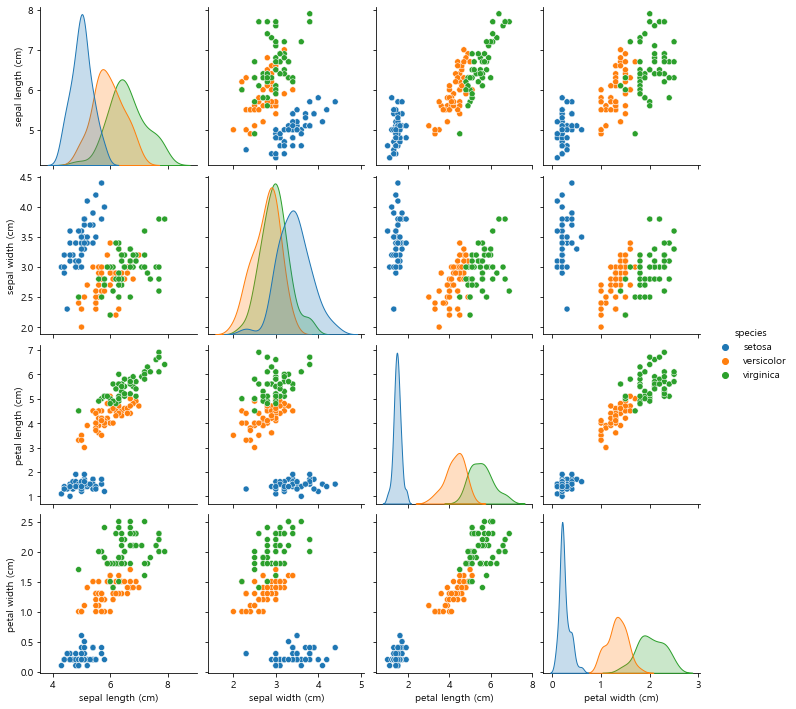

In [131]:
sns.pairplot(iris_frm, hue='species')

In [132]:
iris_frm['species']=iris_frm['species'].replace(['setosa','versicolor','virginica'],[0,1,2])
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### sepal length를 삭제 후, 학습을 통해 예측해보자.

In [133]:
X = iris_frm.drop('sepal length (cm)', axis=1)
X

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [134]:
Y = iris_frm['sepal length (cm)'] 
Y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [138]:
# 모델 생성
iris_model = LinearRegression()
iris_model.fit(X,Y)

print('w(기울기 : )',iris_model.coef_)
print('b(절편 : )',iris_model.intercept_)

# 모델의 신뢰도 R 구하기
r_squared = iris_model.score(X,Y)
print("R : ",r_squared)

w(기울기 : ) [ 0.62527882  0.74292448 -0.40447855 -0.22635635]
b(절편 : ) 1.8511983449847396
R :  0.8621931701975809


In [139]:
# 사용자 데이터로 예측
user_pred = iris_model.predict([[4.2,1.3,0.2, 1.0]])
print('sepal length guess: ',user_pred)

sepal length guess:  [5.13591913]


In [140]:
# 데이터 세트 분리 8:2
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [141]:
# 분리된 데이터로 실습해보기 위해 다시 모델 생성.
iris_model = LinearRegression()
iris_model.fit(X_train,y_train)

print('w(기울기 : )',iris_model.coef_)
print('b(절편 : )',iris_model.intercept_)

# 모델의 신뢰도 R 구하기
r_squared = iris_model.score(X,Y)
print("R : ",r_squared)

w(기울기 : ) [ 0.66198457  0.78299303 -0.42708997 -0.291799  ]
b(절편 : ) 1.692011762223541
R :  0.8611141724044685


In [143]:
# 예측값과 실제값을 가진 데이터프레임 생성. 
y_pred = iris_model.predict(X_test)
sepal_length_actual_guess = pd.DataFrame({
    'actual_sepal_length': y_test,
    'guess_sepal_length': y_pred
})

sepal_length_actual_guess

,actual_sepal_length,guess_sepal_length
84,5.4,6.269000
122,7.7,7.353844
28,5.2,4.953532
24,4.8,5.345028
75,6.6,6.233410
109,7.2,7.200091
81,5.5,5.458960
98,5.1,4.934354
80,5.5,5.494550
100,6.3,6.923196


In [150]:
print('성능평가지표')
print()
print('mse : ', mean_squared_error(y_test, y_pred))
print('mae : ', mean_absolute_error(y_test, y_pred))
print('R: ', iris_model.score(X_test,y_test))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred)))

성능평가지표

mse :  0.11211610248766021
mae :  0.2558151623090264
R:  0.8608904650947197
rmse :  0.3348374269517376


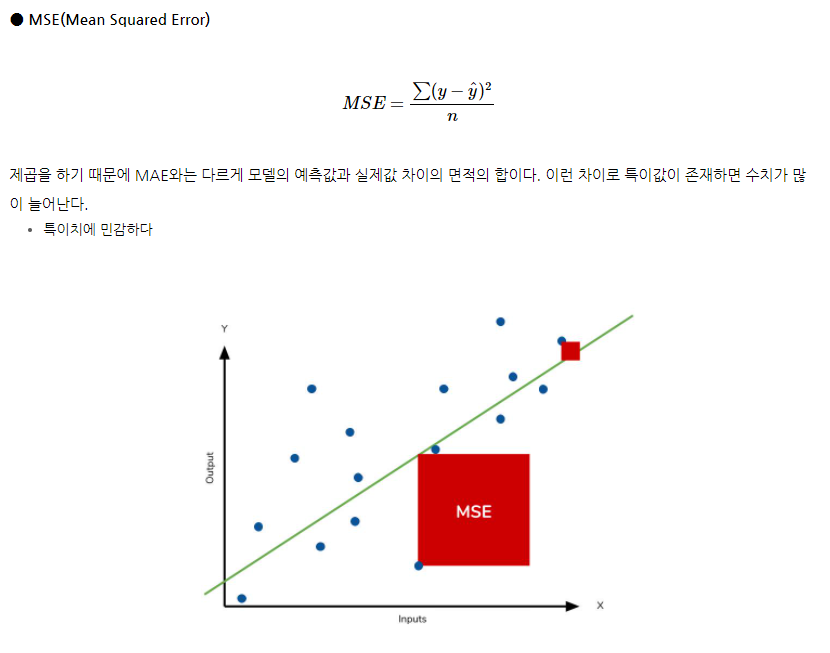

In [196]:
Image('c:/img/regression-eval-mse.png', width = 700)

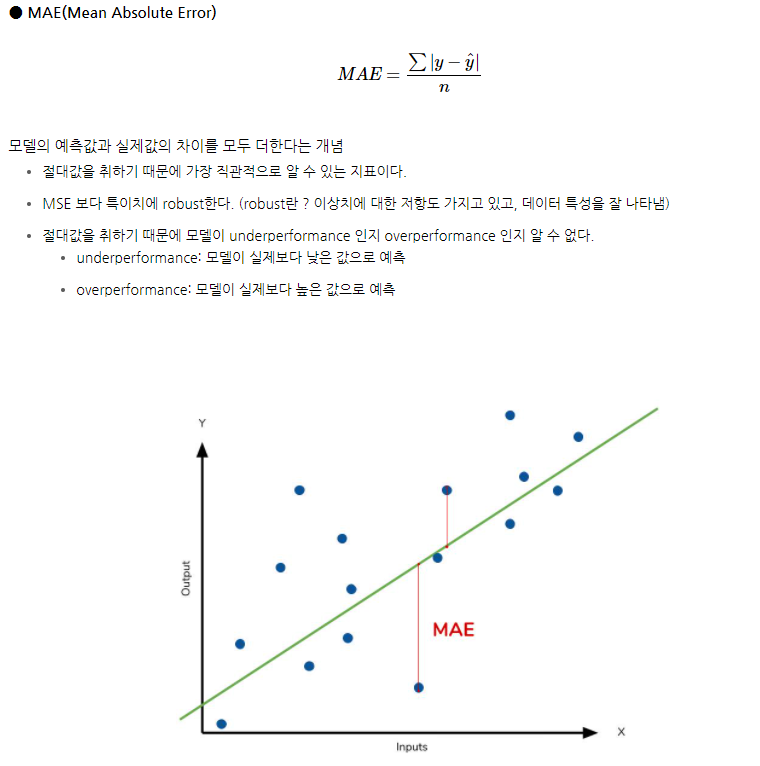

In [197]:
Image('c:/img/regression-eval-mae.png', width = 700)

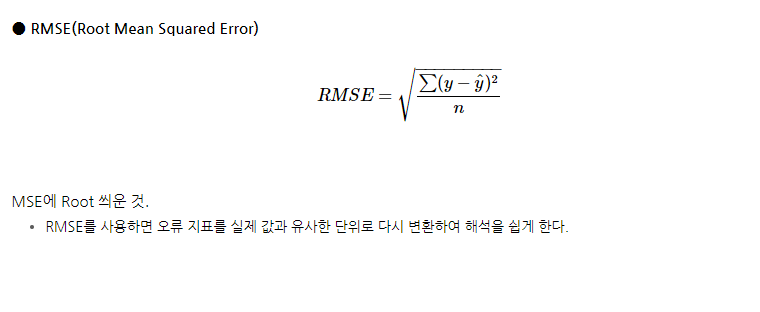

In [198]:
Image('c:/img/regression-eval-rmse.png', width = 700)